In [1]:
# Some basic comparisons of DEGs

sig_DE = DE_results_TSS[DE_results_TSS['pvalue'] < pval_cutoff]
sig_DE_up = sig_DE[sig_DE['log2FoldChange'] > 0]
sig_DE_down = sig_DE[sig_DE['log2FoldChange'] <= 0]




NameError: name 'DE_results_TSS' is not defined

# inspect TSS binding around DEGs from deSEQ2

--> optional/for later: bar graph/general comparison of sets, numbers of DETs + DEGs between these and elphege's orig. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import bbi

In [18]:
import gffutils
import pybedtools
from pybedtools.featurefuncs import TSS
from gffutils.helpers import asinterval
import bioframe as bf
from gtfparse import read_gtf

In [19]:
# Reading gtf file that contains only the parsed TSSes
tss_df = read_gtf('/project/fudenber_735/genomes/mm9/ensembl/tsses.gtf')

# cleaning out less-well defined chromosome numbers
tss_df = tss_df.loc[False==( tss_df['seqname'].str.contains('NT_'))]
tss_df = tss_df.loc[False==( tss_df['seqname'].str.contains('MT'))]

# paste 'chr' to all chromosome names
tss_df["seqname"] = 'chr' + tss_df["seqname"]

# rename column to chrom to match bedframe/bioframe format
tss_df = tss_df.rename(columns= {"seqname" : "chrom"})

/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id']


In [20]:
# data needed from sleuth to compare 

# s2c to collapse tpm into averages
s2c = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/s2c.csv", index_col = 0)

# t2g to compare gene-level analysis
t2g = pd.read_csv("/project/fudenber_735/genomes/mm9/ensembl/ensembl_relational_downloads/biomaRt_mm9_t2g.csv", index_col = 0)


In [21]:
conditions = s2c['condition'].unique()
conditions = [x.strip().replace("-","_").split("RNA_seq_")[1] for x in conditions]

conditions

['CTCF_AID_untreated',
 'CTCF_AID_auxin1day',
 'CTCF_AID_auxin2days',
 'CTCF_AID_auxin4days',
 'CTCF_AID_washoff2days',
 'WT_untagged_untreated',
 'WT_untagged_auxin2days',
 'WT_untagged_auxin4days']

In [45]:
# import DEseq results

# Importing the .csv outputs from sleuth WT for each of the conditions into pandas dataframes:
deseq_results = {}

folder = "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/deseq-mm9-results/"

for c in conditions[1:]:
    
    df = pd.read_csv(folder+"pairwise_deseq_wt_"+c+".csv", index_col = 0)
    deseq_results[c] = df


In [46]:
deseq_results['CTCF_AID_auxin1day'].head(20)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001,4942.457855,-0.033551,0.236434,-0.141905,8.871554e-01,9.998054e-01
ENSMUSG00000000003,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000000028,2278.335221,-0.091383,0.163252,-0.559764,5.756404e-01,9.998054e-01
ENSMUSG00000000037,398.325060,2.463827,0.236823,10.403647,2.386216e-25,4.369956e-22
ENSMUSG00000000049,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000000056,667.816353,-0.088395,0.186376,-0.474284,6.352971e-01,9.998054e-01
ENSMUSG00000000058,15.951386,0.738056,0.779442,0.946903,3.436883e-01,9.998054e-01
ENSMUSG00000000078,1667.175867,0.258040,0.297498,0.867368,3.857402e-01,9.998054e-01
ENSMUSG00000000085,632.184474,-0.605628,0.233157,-2.597512,9.390194e-03,2.927234e-01
ENSMUSG00000000088,8211.286328,0.011256,0.121863,0.092369,9.264046e-01,9.998054e-01


In [24]:
len(tss_df)
tss_df.head(50)

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
0,chr3,gffutils_derived,transcript,107949065,107949065,NaN,-,0,ENSMUST00000000001,ENSMUSG00000000001
1,chrX,gffutils_derived,transcript,75098963,75098963,NaN,-,0,ENSMUST00000000003,ENSMUSG00000000003
2,chrX,gffutils_derived,transcript,75098870,75098870,NaN,-,0,ENSMUST00000114041,ENSMUSG00000000003
3,chr16,gffutils_derived,transcript,18812066,18812066,NaN,-,0,ENSMUST00000000028,ENSMUSG00000000028
4,chr16,gffutils_derived,transcript,18811720,18811720,NaN,-,0,ENSMUST00000096990,ENSMUSG00000000028
5,chr16,gffutils_derived,transcript,18812081,18812081,NaN,-,0,ENSMUST00000115585,ENSMUSG00000000028
6,chr7,gffutils_derived,transcript,149762816,149762816,NaN,-,0,ENSMUST00000132294,ENSMUSG00000000031
7,chr7,gffutils_derived,transcript,149764049,149764049,NaN,-,0,ENSMUST00000136359,ENSMUSG00000000031
8,chr7,gffutils_derived,transcript,149762444,149762444,NaN,-,0,ENSMUST00000140716,ENSMUSG00000000031
9,chr7,gffutils_derived,transcript,149764001,149764001,NaN,-,0,ENSMUST00000149974,ENSMUSG00000000031


In [25]:
# How many have transcript id == gene id
n_same_id = len(tss_df[tss_df['transcript_id'].str.split("T").str[1] == tss_df['gene_id'].str.split("G").str[1]])

# Total number of unique gene ids
n_genes = len(np.unique(tss_df['gene_id']))

print(n_same_id)
print(n_genes)
print("Percentage of genes with a transcript with a transcript_id assigned to match gene_id: " + str(n_same_id/n_genes))

5
37273
Percentage of genes with a transcript with a transcript_id assigned to match gene_id: 0.00013414535991200063


In [26]:
# get only the rows that have duplicates
dup_tss = tss_df[tss_df.duplicated('gene_id')]

In [27]:
tss_df[tss_df['gene_id'] == 'ENSMUSG00000000244']

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
193,chr7,gffutils_derived,transcript,150190950,150190950,NaN,+,0,ENSMUST00000009396,ENSMUSG00000000244
194,chr7,gffutils_derived,transcript,150191542,150191542,NaN,+,0,ENSMUST00000075172,ENSMUSG00000000244
195,chr7,gffutils_derived,transcript,150191589,150191589,NaN,+,0,ENSMUST00000082008,ENSMUSG00000000244
196,chr7,gffutils_derived,transcript,150191563,150191563,NaN,+,0,ENSMUST00000105921,ENSMUSG00000000244
197,chr7,gffutils_derived,transcript,150191563,150191563,NaN,+,0,ENSMUST00000105922,ENSMUSG00000000244
198,chr7,gffutils_derived,transcript,150191575,150191575,NaN,+,0,ENSMUST00000105923,ENSMUSG00000000244
199,chr7,gffutils_derived,transcript,150191603,150191603,NaN,+,0,ENSMUST00000105924,ENSMUSG00000000244
200,chr7,gffutils_derived,transcript,150191603,150191603,NaN,+,0,ENSMUST00000105925,ENSMUSG00000000244
201,chr7,gffutils_derived,transcript,150190964,150190964,NaN,+,0,ENSMUST00000141186,ENSMUSG00000000244
202,chr7,gffutils_derived,transcript,150191832,150191832,NaN,+,0,ENSMUST00000143512,ENSMUSG00000000244


In [28]:
tss_df.drop_duplicates(['gene_id']).head(60)

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
0,chr3,gffutils_derived,transcript,107949065,107949065,NaN,-,0,ENSMUST00000000001,ENSMUSG00000000001
1,chrX,gffutils_derived,transcript,75098963,75098963,NaN,-,0,ENSMUST00000000003,ENSMUSG00000000003
3,chr16,gffutils_derived,transcript,18812066,18812066,NaN,-,0,ENSMUST00000000028,ENSMUSG00000000028
6,chr7,gffutils_derived,transcript,149762816,149762816,NaN,-,0,ENSMUST00000132294,ENSMUSG00000000031
11,chrX,gffutils_derived,transcript,157600703,157600703,NaN,+,0,ENSMUST00000019101,ENSMUSG00000000037
21,chr11,gffutils_derived,transcript,108256606,108256606,NaN,+,0,ENSMUST00000000049,ENSMUSG00000000049
25,chr11,gffutils_derived,transcript,121098566,121098566,NaN,+,0,ENSMUST00000103015,ENSMUSG00000000056
28,chr6,gffutils_derived,transcript,17231184,17231184,NaN,+,0,ENSMUST00000000058,ENSMUSG00000000058
31,chr13,gffutils_derived,transcript,5860734,5860734,NaN,+,0,ENSMUST00000000080,ENSMUSG00000000078
32,chr4,gffutils_derived,transcript,120077911,120077911,NaN,+,0,ENSMUST00000000087,ENSMUSG00000000085


In [29]:
tss_df[tss_df['gene_id'] == 'ENSMUSG00000000028']

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
3,chr16,gffutils_derived,transcript,18812066,18812066,NaN,-,0,ENSMUST00000000028,ENSMUSG00000000028
4,chr16,gffutils_derived,transcript,18811720,18811720,NaN,-,0,ENSMUST00000096990,ENSMUSG00000000028
5,chr16,gffutils_derived,transcript,18812081,18812081,NaN,-,0,ENSMUST00000115585,ENSMUSG00000000028


In [30]:
tss_df[tss_df['gene_id'] == 'ENSMUSG00000000058']

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
28,chr6,gffutils_derived,transcript,17231184,17231184,NaN,+,0,ENSMUST00000000058,ENSMUSG00000000058
29,chr6,gffutils_derived,transcript,17231326,17231326,NaN,+,0,ENSMUST00000115459,ENSMUSG00000000058
30,chr6,gffutils_derived,transcript,17231358,17231358,NaN,+,0,ENSMUST00000115462,ENSMUSG00000000058


In [31]:
tss_df[tss_df['gene_id'] == 'ENSMUSG00000000142']

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
93,chr11,gffutils_derived,transcript,108781662,108781662,NaN,+,0,ENSMUST00000052915,ENSMUSG00000000142
94,chr11,gffutils_derived,transcript,108784494,108784494,NaN,+,0,ENSMUST00000106711,ENSMUSG00000000142
95,chr11,gffutils_derived,transcript,108804934,108804934,NaN,+,0,ENSMUST00000139682,ENSMUSG00000000142
96,chr11,gffutils_derived,transcript,108782113,108782113,NaN,+,0,ENSMUST00000140821,ENSMUSG00000000142
97,chr11,gffutils_derived,transcript,108800187,108800187,NaN,+,0,ENSMUST00000144130,ENSMUSG00000000142
98,chr11,gffutils_derived,transcript,108782961,108782961,NaN,+,0,ENSMUST00000144511,ENSMUSG00000000142
99,chr11,gffutils_derived,transcript,108782649,108782649,NaN,+,0,ENSMUST00000152909,ENSMUSG00000000142


In [32]:
ctcf_keys = [x for x in list(deseq_results.keys()) if 'CTCF' in x]

basic_deseq_ctcf = {condition: deseq_results[condition] for condition in ctcf_keys }

basic_deseq_ctcf.keys()

dict_keys(['CTCF_AID_auxin1day', 'CTCF_AID_auxin2days', 'CTCF_AID_auxin4days', 'CTCF_AID_washoff2days'])

In [33]:
tss_df.head(4)

,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
0,chr3,gffutils_derived,transcript,107949065,107949065,NaN,-,0,ENSMUST00000000001,ENSMUSG00000000001
1,chrX,gffutils_derived,transcript,75098963,75098963,NaN,-,0,ENSMUST00000000003,ENSMUSG00000000003
2,chrX,gffutils_derived,transcript,75098870,75098870,NaN,-,0,ENSMUST00000114041,ENSMUSG00000000003
3,chr16,gffutils_derived,transcript,18812066,18812066,NaN,-,0,ENSMUST00000000028,ENSMUSG00000000028


Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.
Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.
Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.
Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.


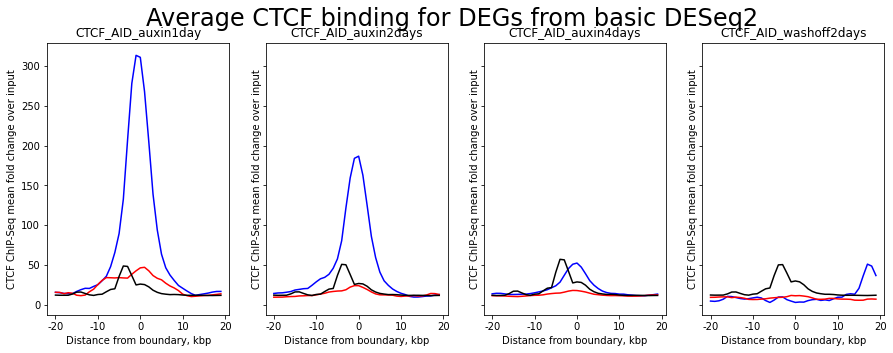

In [105]:
# Todo: plot distance from TSS on x-axis) versus average CTCF binding (from stackup)
chip_seq_file = "/scratch/pokorny/Elphege_2017/GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw"
DE_result_dict = basic_deseq_ctcf
qval_cutoff = 0.05

deseq_degs_ctcf_binding(basic_deseq_ctcf, 
                        "Average CTCF binding for DEGs from basic DESeq2",
                        qval_cutoff,
                        chip_seq_file)

==== General percentages for Condition : CTCF_AID_auxin1day====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 289
Number of DE transcripts with an annotated TSS: 287
Number of up-regulated genes: 129
Number of down-regulated genes: 158

==== General percentages for Condition : CTCF_AID_auxin2days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 909
Number of DE transcripts with an annotated TSS: 885
Number of up-regulated genes: 568
Number of down-regulated genes: 317

==== General percentages for Condition : CTCF_AID_auxin4days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 3963
Number of DE transcripts with an annotated TSS: 3900
Number of up-regulated genes: 2184
Number of down-regulated genes: 1716

==== General percentages for Condition : CTCF_AID_washoff2days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 201
Number of DE transcripts with an annotated TSS: 187
Number of 

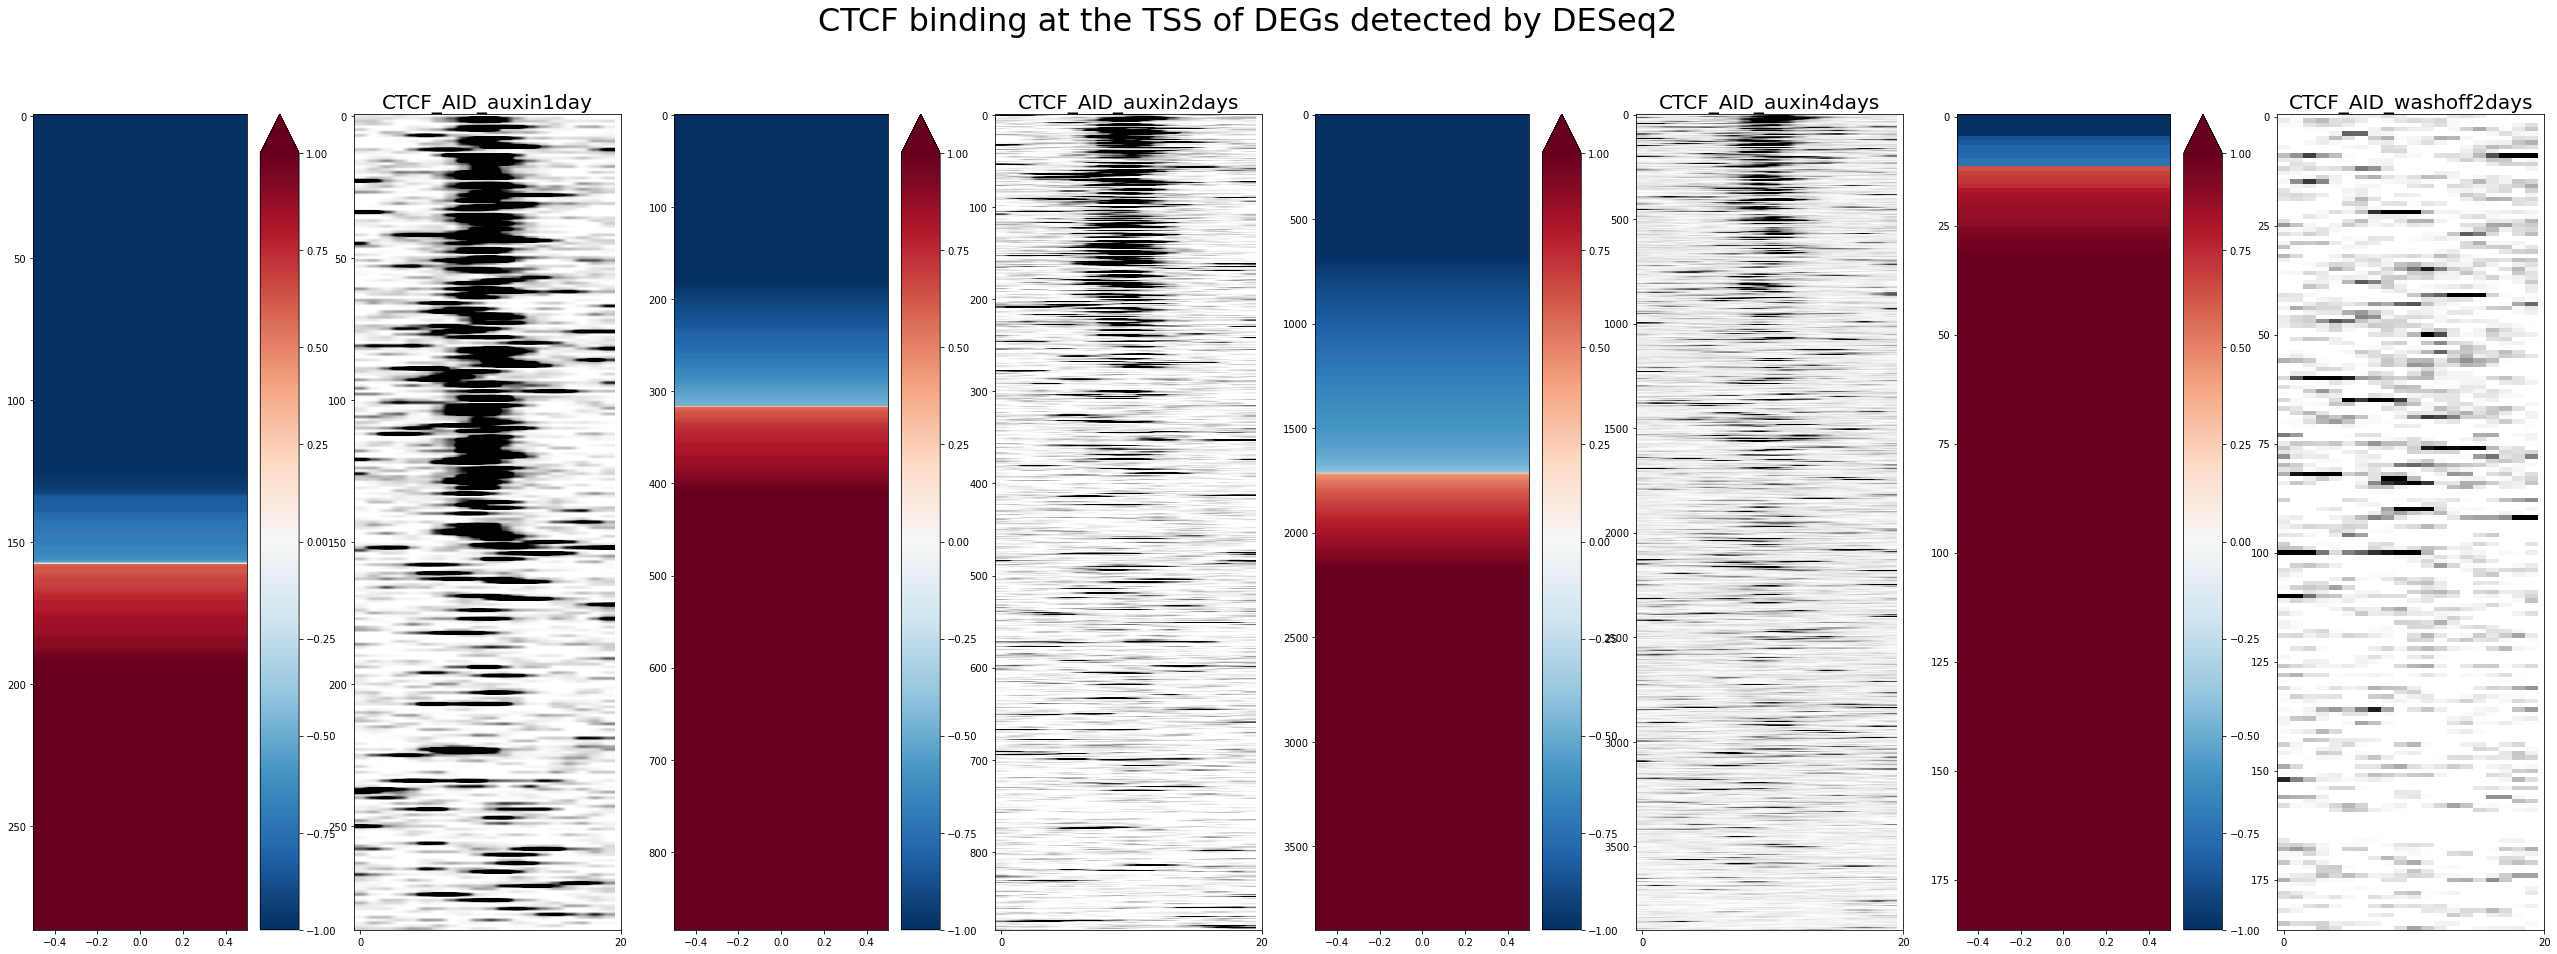

In [99]:
plot_deseq_CTCF_binding_together(basic_deseq_ctcf, 
                                 tss_df,
                                 chip_seq_file,
                                 cutoff,
                                 "CTCF binding at the TSS of DEGs detected by DESeq2")

In [104]:
## To average CTCF signal for up-regulated vs down-regulated genes
def deseq_degs_ctcf_binding(DE_result_dict, figure_title, pval_cutoff, chip_seq_file):

    # Getting plots ready
    fig, ax = plt.subplots(1,len(DE_result_dict), sharey=True, figsize=(15, 5))
    fig.suptitle(figure_title, fontsize=24)
    i = 0

    for condition, DE_result_df in DE_result_dict.items():

        # lookup the TSS for this set of transcripts
        DE_results_TSS = DE_result_df.merge(tss_df.drop_duplicates(['gene_id']), left_index=True, right_on='gene_id')

        # how many did not have a transcript/were dropped?
        ni = len(DE_result_df)
        ntss = len(DE_results_TSS)
        print("Out of " + str(ni) + " transcripts from the sleuth output results, " + str(ntss) + " had corresponding TSS from ensembl GTF files.")
        print("Lost " + str(ni-ntss) + " transcripts for this analysis.")

        # Extracting significantly DE transcripts
        sig_DE = DE_results_TSS[DE_results_TSS['padj'] < pval_cutoff]
        sig_DE_up = sig_DE[sig_DE['log2FoldChange'] > 0]
        sig_DE_down = sig_DE[sig_DE['log2FoldChange'] <= 0]

        # Will also look at enrichment around transcripts that were in RNAseq dataset that did not have significant DE
        nonsig_DE = DE_results_TSS[DE_results_TSS['pvalue'] >= pval_cutoff]

        nbins = 40

        # initializing variables for pybbi matrices
        DE_up_matrix = None
        DE_down_matrix = None

        # Generating summary of chip seq signal within the bins -1000 and +1000 from the TSS loc
        with bbi.open(chip_seq_file) as f:
            if not sig_DE_up.empty:
                DE_up_matrix = f.stackup(sig_DE_up['chrom'], sig_DE_up['start'] - 1000, sig_DE_up['end'] + 1000, bins=nbins)
            if not sig_DE_down.empty:
                DE_down_matrix = f.stackup(sig_DE_down['chrom'], sig_DE_down['start'] - 1000, sig_DE_down['end'] + 1000, bins=nbins)
            nonsig_DE_matrix = f.stackup(nonsig_DE['chrom'], nonsig_DE['start'] - 1000, nonsig_DE['end'] + 1000, bins=nbins)



        if DE_down_matrix is not None:
            ax[i].plot(np.nanmean(DE_down_matrix, axis=0), color = 'b' )

        if DE_up_matrix is not None:
            ax[i].plot(np.nanmean(DE_up_matrix, axis=0), color = 'r' )

        ax[i].plot(np.nanmean(nonsig_DE_matrix, axis=0), color = 'k')

        ax[i].set(xticks=np.arange(0, nbins+1, 10),
               xticklabels=(np.arange(0, nbins+1, 10)-nbins//2),
               xlabel='Distance from boundary, kbp',
               ylabel='CTCF ChIP-Seq mean fold change over input')
        ax[i].set_title(condition)

        i+=1


In [100]:
plt.savefig("avg_ctcf_binding_deseq")

<Figure size 432x288 with 0 Axes>

In [101]:
# import DEseq results

# Importing the .csv outputs from sleuth WT for each of the conditions into pandas dataframes:
deseq_batch_results = {}

folder = "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/deseq-mm9-results/"

for c in conditions[1:]:
    
    df = pd.read_csv(folder+"pairwise_batch_deseq_wt_"+c+".csv", index_col = 0)
    deseq_batch_results[c] = df

Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.
Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.
Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.
Out of 26520 transcripts from the sleuth output results, 25785 had corresponding TSS from ensembl GTF files.
Lost 735 transcripts for this analysis.


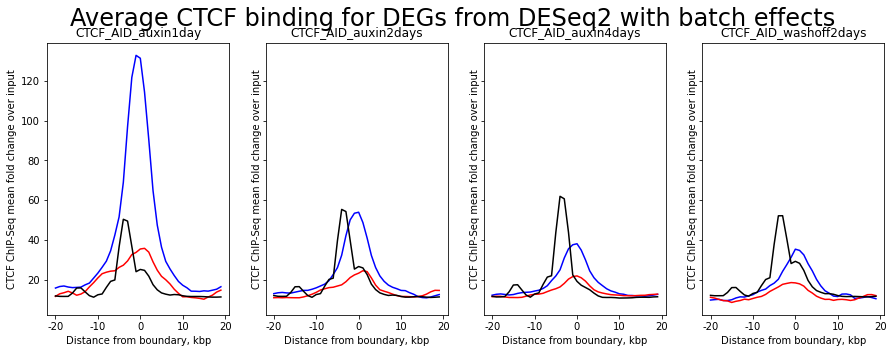

In [106]:
chip_seq_file = "/scratch/pokorny/Elphege_2017/GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw"
cutoff = 0.05
ctcf_keys = [x for x in list(deseq_batch_results.keys()) if 'CTCF' in x]
deseq_batch_ctcf = {condition: deseq_batch_results[condition] for condition in ctcf_keys }


deseq_degs_ctcf_binding(deseq_batch_ctcf, 
                        "Average CTCF binding for DEGs from DESeq2 with batch effects", 
                        cutoff, 
                        chip_seq_file)

In [108]:
plt.savefig("avg_ctcf_binding_deseq_batch")

<Figure size 432x288 with 0 Axes>

==== General percentages for Condition : CTCF_AID_auxin1day====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 1264
Number of DE transcripts with an annotated TSS: 1249
Number of up-regulated genes: 518
Number of down-regulated genes: 731

==== General percentages for Condition : CTCF_AID_auxin2days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 3759
Number of DE transcripts with an annotated TSS: 3699
Number of up-regulated genes: 1421
Number of down-regulated genes: 2278

==== General percentages for Condition : CTCF_AID_auxin4days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 6700
Number of DE transcripts with an annotated TSS: 6598
Number of up-regulated genes: 3051
Number of down-regulated genes: 3547

==== General percentages for Condition : CTCF_AID_washoff2days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 990
Number of DE transcripts with an annotated TSS: 971
Numb

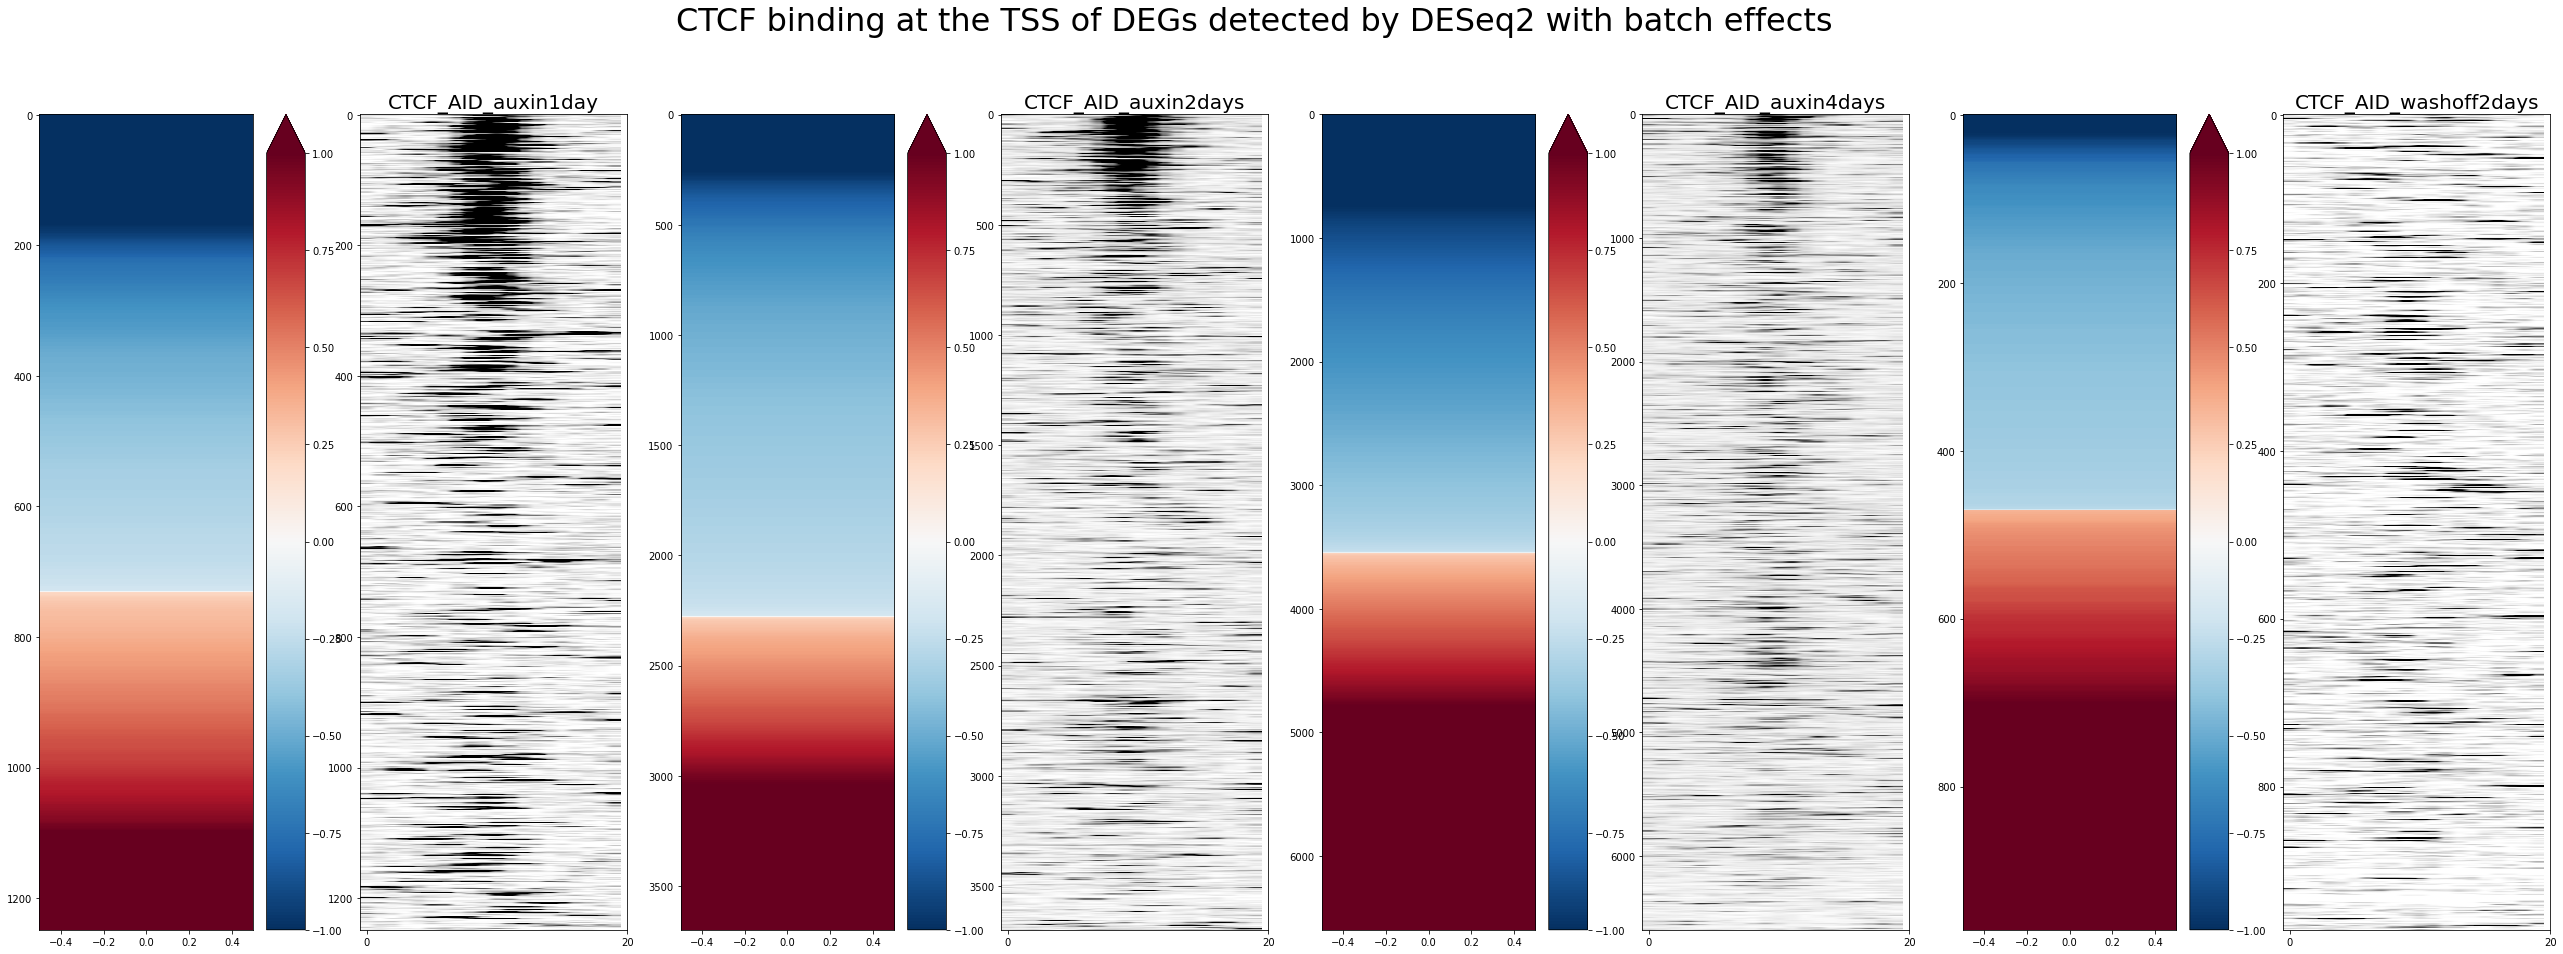

In [102]:
plot_deseq_CTCF_binding_together(deseq_batch_ctcf, 
                                 tss_df,
                                 chip_seq_file,
                                 cutoff,
                                 "CTCF binding at the TSS of DEGs detected by DESeq2 with batch effects")

In [103]:
plt.savefig("ctcf_binding_tss_deseq_batch")

<Figure size 432x288 with 0 Axes>

In [98]:
## For plotting the log change in FPKM, as a measure of differential expression, alongside the binding of 
## that transcript at it's TSS.
# 
# cutoff: the deltaFPKM to take
# DE_df: must have the columns 'delta' for the FPKM, must be in sorted order by delta
# CTCF ChIP-exo filepath
def plot_deseq_CTCF_binding_together(DE_result_dict, tss_df, chip_seq_file, qval_cutoff, plot_title):
    
    
    # Getting plots ready
    fig, ax = plt.subplots(1,2*len(DE_result_dict), figsize=(45, 15))
    fig.suptitle(plot_title, fontsize=32)
    i = 0
    
    for condition, DE_result_df in DE_result_dict.items():

        # Extracting only rows that are above the cutoff
        sig_DE = DE_result_df[DE_result_df['padj'] < qval_cutoff]

        sig_DE = sig_DE.sort_values(by=['log2FoldChange'])

        n_DE_tot = len(sig_DE)

        # lookup the TSS for this set of transcripts
        window_df = sig_DE.merge(tss_df.drop_duplicates(['gene_id']), left_index=True, right_on='gene_id')
        

        # Generating summary of chip seq signal within the bins -1000 and +1000 from the TSS loc
        with bbi.open(chip_seq_file) as f:
            DE_matrix = f.stackup(window_df['chrom'], window_df['start'] - 1000, window_df['end'] + 1000, bins=20)


        # split by positive and negative values for plotting
        DE_up = window_df[window_df['log2FoldChange'] > 0]
        DE_down = window_df[window_df['log2FoldChange'] < 0]

        n = len(window_df)
        n_up = len(DE_up)
        n_down = len(DE_down)

        print("==== General percentages for Condition : " + condition + "====")
        print("Setting qval cutoff to: " + str(qval_cutoff))
        print("Number of DE transcripts with this cutoff: " + str(n_DE_tot))
        print("Number of DE transcripts with an annotated TSS: " + str(n))
        print("Number of up-regulated genes: " + str(n_up))
        print("Number of down-regulated genes: " + str(n_down))
        print()


        # extracting the beta change vector
        logFPKM = window_df['log2FoldChange']
        logFPKM = np.transpose(np.expand_dims(logFPKM, axis=0))
        minval=np.min(logFPKM)
        maxval=np.max(logFPKM)
        # if diverging, color negative values blue
        if (minval < 0):
            divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0., vmax=1)
            hotcoldmap = plt.cm.get_cmap('RdBu').reversed()
            occ = ax[i].imshow(logFPKM, cmap=hotcoldmap, norm=divnorm, aspect='auto')
        # pcolormesh(your_data, cmap="coolwarm", norm=divnorm)
        else:
            minval= 0
            occ = ax[i].imshow(logFPKM, cmap='Reds', norm=colors.Normalize(vmin=0, vmax=1), aspect='auto')


        cbar = ax[i].figure.colorbar(occ, ax=ax[i], extend='max')
        i+=1
        name = condition
        ax[i].set_title(name, fontsize=20)
        # Plotting ctcf binding
        fig = ax[i].imshow(DE_matrix, cmap='gray_r', aspect='auto', vmin=0, vmax=100)
        ax[i].set_xticks([0, 20])
        i+=1

    plt.show()

In [110]:
up_deseq = {}
down_deseq = {}
up_batch_deseq = {}
down_batch_deseq = {}
qval_cutoff = 0.05

for cond, DE_results in deseq_results.items():

    sig_DE = DE_results[DE_results['padj'] < qval_cutoff]
    sig_DE_up = sig_DE[sig_DE['log2FoldChange'] > 0]
    sig_DE_down = sig_DE[sig_DE['log2FoldChange'] <= 0]
    
    up_deseq[cond] = len(sig_DE_up)
    down_deseq[cond] = len(sig_DE_down)
    
for cond, DE_results in deseq_batch_results.items():
    
    sig_DE = DE_results[DE_results['padj'] < qval_cutoff]
    sig_DE_up = sig_DE[sig_DE['log2FoldChange'] > 0]
    sig_DE_down = sig_DE[sig_DE['log2FoldChange'] <= 0]
    
    up_batch_deseq[cond] = len(sig_DE_up)
    down_batch_deseq[cond] = len(sig_DE_down)
    
    


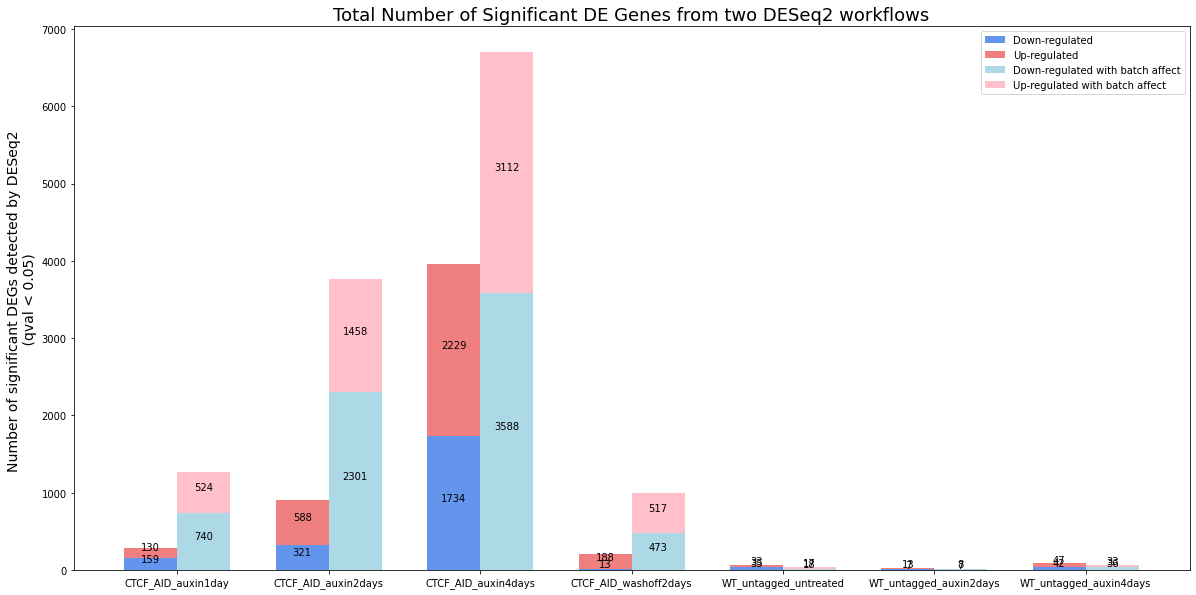

In [114]:
width = 0.35

fig, ax = plt.subplots(figsize=[20,10])

downbars = ax.bar(down_deseq.keys(), list(down_deseq.values()), -width, align='edge', label = "Down-regulated", color='cornflowerblue')
upbars = ax.bar(up_deseq.keys(), list(up_deseq.values()), -width, align='edge', bottom = list(down_deseq.values()), label = "Up-regulated", color='lightcoral')

downbars2 = ax.bar(down_batch_deseq.keys(), list(down_batch_deseq.values()), +width, align='edge', label = "Down-regulated with batch affect", color='lightblue')
upbars2 = ax.bar(up_batch_deseq.keys(), list(up_batch_deseq.values()), +width, align='edge', bottom = list(down_batch_deseq.values()), label = "Up-regulated with batch affect", color='pink')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        b = rect.get_y()
        plt.text(rect.get_x() + rect.get_width()/2., .5*(height)+b,
                '%d' % int(height),
                ha='center', va='bottom')


plt.ylabel("Number of significant DEGs detected by DESeq2 \n (qval < 0.05) ", size=14)
plt.title("Total Number of Significant DE Genes from two DESeq2 workflows", size=18)
plt.legend()

autolabel(upbars)
autolabel(upbars2)
autolabel(downbars)
autolabel(downbars2)

plt.show()

# Looking into relationship with distal enhancers

## Variation 1: dCTCF DEGs mapped to mm9 (kallisto, DESeq)

- [x] download enhancer coords
- [x] apply TSS annotation to everything
- [x] separate DEGs by up, down, or unchanged
- [x] get all distances from tss to enhancers (bioframe func -- should be baby)
- [x] sort by distances
- [x] plottttyyyyy

In [11]:
# looks to be the right format
bf.SCHEMAS['bedGraph']

['chrom', 'start', 'end', 'value']

In [14]:
enhancer_coords = bf.read_table('/project/fudenber_735/collaborations/karissa_2022/features/mm9/mESC_Enhancer_prediction_Chen12_BMCgenomics_mm9.bed',
                               schema='bedGraph',
                               skiprows=1)

In [15]:
enhancer_coords

,chrom,start,end,value
0,chr3,34660001,34661000,1
1,chr7,3206001,3207000,1
2,chr8,91527001,91528000,1
3,chr9,110850001,110851000,1
4,chr12,87842001,87843000,"0,9999"
...,...,...,...,...
19195,chr5,102462001,102463000,"0,336"
19196,chr13,110441001,110442000,"0,3358"
19197,chr7,106707001,106708000,"0,3355"
19198,chr4,81950001,81951000,"0,3349"


In [49]:
# import DEseq results

# Importing the .csv outputs from sleuth WT for each of the conditions into pandas dataframes:
basic_deseq_results = {}

folder = "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/deseq-mm9-results/"

for c in conditions[1:]:
    
    df = pd.read_csv(folder+"pairwise_deseq_wt_"+c+".csv")
    basic_deseq_results[c] = df.rename(columns={"Unnamed: 0" : 'gene_id'})


In [58]:
print(len(basic_deseq_results['CTCF_AID_auxin1day']))


tss_deseq_res = basic_deseq_results['CTCF_AID_auxin1day'].merge(tss_df.drop_duplicates(['gene_id']), how='inner', on='gene_id')
print(len(tss_deseq_res))


26520
25785


In [79]:
up_ix = np.where((tss_deseq_res['padj'] < 0.05) & (tss_deseq_res['log2FoldChange'] > 0))
down_ix = np.where((tss_deseq_res['padj'] < 0.05) & (tss_deseq_res['log2FoldChange'] < 0))
nonsig_ix = np.where(tss_deseq_res['padj'] >= 0.05)

In [80]:
# Quick count to confirm this is filtering the same as earlier
print("number up up-regulated genes: " + str(len(tss_deseq_res.iloc[up_ix])))
print("number up down-regulated genes: " + str(len(tss_deseq_res.iloc[down_ix])))

number up up-regulated genes: 129
number up down-regulated genes: 158


summary from DESEq2:

```
out of 22072 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 130, 0.59%
LFC < 0 (down)     : 159, 0.72%
outliers [1]       : 86, 0.39%
low counts [2]     : 5504, 25%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results
```

In [73]:
bf.is_bedframe(tss_deseq_res)

True

In [75]:
bf.is_bedframe(enhancer_coords)

True

In [118]:
only_treatment_results = [x for x in list(basic_deseq_results.keys()) if 'CTCF_AID_auxin' in x] 


For condition CTCF_AID_auxin1day, there are 9885 DE genes out of 25785 total (that have a mappable TSS)
Number of up-regulated genes: 129
Number of down-regulated genes: 158

For condition CTCF_AID_auxin2days, there are 10349 DE genes out of 25785 total (that have a mappable TSS)
Number of up-regulated genes: 568
Number of down-regulated genes: 317



/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:484: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:484: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:484: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:484: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:484: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, 

For condition CTCF_AID_auxin4days, there are 12298 DE genes out of 25785 total (that have a mappable TSS)
Number of up-regulated genes: 2184
Number of down-regulated genes: 1716



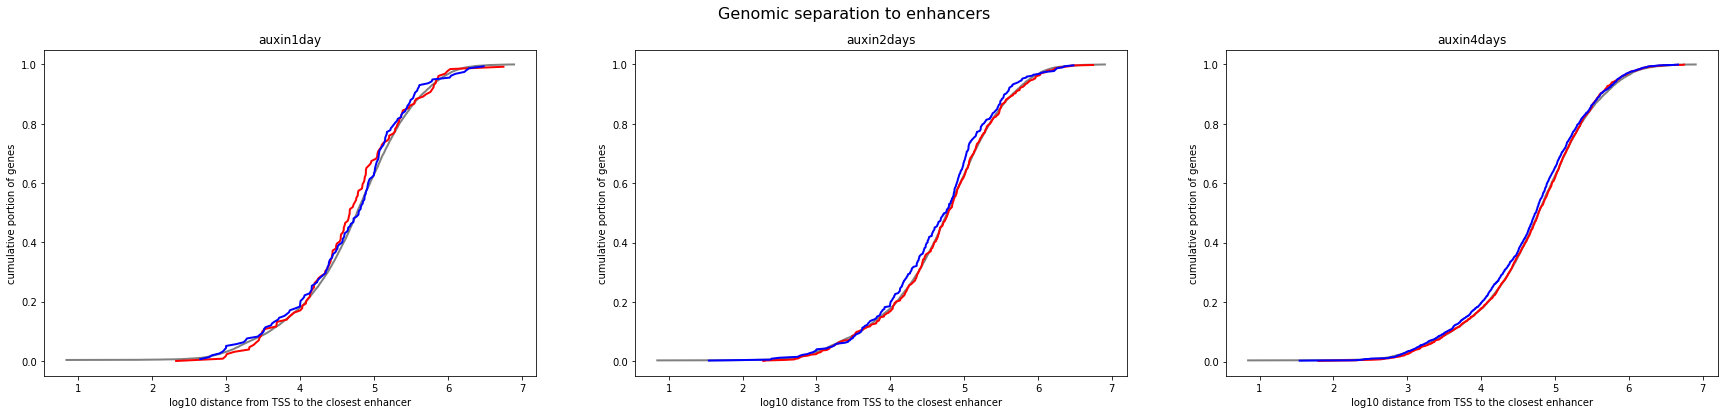

In [120]:
## Big description of what ze heck is happenin here:
num_plots = len(only_treatment_results)
fig, axs = plt.subplots(1, num_plots, figsize=[num_plots*10, 6])
fig.suptitle("Genomic separation to enhancers", fontsize=16)

for condition, ax in zip(only_treatment_results, axs.ravel()):
    tss_deseq_res = basic_deseq_results[condition].merge(tss_df.drop_duplicates(['gene_id']),
                                                         how='inner',
                                                         on='gene_id')
    
    up_ix = np.where((tss_deseq_res['padj'] < 0.05) & (tss_deseq_res['log2FoldChange'] > 0))
    down_ix = np.where((tss_deseq_res['padj'] < 0.05) & (tss_deseq_res['log2FoldChange'] < 0))
    nonsig_ix = np.where(tss_deseq_res['padj'] >= 0.05)
    
    up_reg_genes = tss_deseq_res.iloc[up_ix]
    down_reg_genes = tss_deseq_res.iloc[down_ix]
    nonsig_genes = tss_deseq_res.iloc[nonsig_ix]
    
    print("=================")
    print("For condition {}, there are {} DE genes out of {} total (that have a mappable TSS)".format(condition, 
                                                                                                      len(tss_deseq_res) - len(nonsig_genes), 
                                                                                                      len(tss_deseq_res)))
    print("Number of up-regulated genes: {}".format(len(up_reg_genes)))
    print("Number of down-regulated genes: {}".format(len(down_reg_genes)))
    print()
    
    closest_intervals = bf.closest(tss_deseq_res, enhancer_coords, suffixes=('_de_tss','_enhancer'))
    tss_deseq_res['distance_to_enhancer'] = closest_intervals['distance']
    
    # generate y axis: cumulative proportion of genes
    cum_all = np.arange(0, len(tss_deseq_res.iloc[nonsig_ix]), 1)
    cum_all = cum_all/ len(tss_deseq_res.iloc[nonsig_ix])

    ax.plot(np.log10(tss_deseq_res.iloc[nonsig_ix]['distance_to_enhancer'].sort_values()), 
                cum_all, 
                color='grey',
                label='Non-regulated',
                linewidth=2)


    # generate y axis: cumulative proportion of genes
    cum_up = np.arange(0, len(tss_deseq_res.iloc[up_ix]), 1)
    cum_up = cum_up/ len(tss_deseq_res.iloc[up_ix])

    ax.plot(np.log10(tss_deseq_res.iloc[up_ix]['distance_to_enhancer'].sort_values()), 
                cum_up, 
                color='red', 
                label='Up-regulated',
                linewidth=2)

    # generate y axis: cumulative proportion of genes
    cum_down = np.arange(0, len(tss_deseq_res.iloc[down_ix]), 1)
    cum_down = cum_down/ len(tss_deseq_res.iloc[down_ix])

    ax.plot(np.log10(tss_deseq_res.iloc[down_ix]['distance_to_enhancer'].sort_values()),
                cum_down,
                color='blue',
                label='Down-regulated',
                linewidth=2)
    
    ax.set_title(condition.replace("CTCF_AID_", ""))
    ax.set_xlabel("log10 distance from TSS to the closest enhancer")
    ax.set_ylabel("cumulative portion of genes")
    
plt.show()


    

### Below is work for generating first graph, was put into the for loop, above, but keeping in case process is easier to decipher in steps below

In [77]:
closest_intervals = bf.closest(tss_deseq_res, enhancer_coords, suffixes=('_de_tss','_enhancer'))
display(closest_intervals)
len(closest_intervals)

,gene_id_de_tss,baseMean_de_tss,log2FoldChange_de_tss,lfcSE_de_tss,stat_de_tss,pvalue_de_tss,padj_de_tss,chrom_de_tss,source_de_tss,feature_de_tss,...,end_de_tss,score_de_tss,strand_de_tss,frame_de_tss,transcript_id_de_tss,chrom_enhancer,start_enhancer,end_enhancer,value_enhancer,distance
0,ENSMUSG00000000544,2291.751812,-0.178754,0.255600,-0.699352,0.484332,0.999805,chr1,gffutils_derived,transcript,...,168060547,NaN,+,0,ENSMUST00000027847,chr1,168055001,168056000,"0,9624",4547
1,ENSMUSG00000000817,1.790351,-0.737808,1.908559,-0.386579,0.699068,NaN,chr1,gffutils_derived,transcript,...,163718627,NaN,-,0,ENSMUST00000000834,chr1,163849001,163850000,"0,7004",130374
2,ENSMUSG00000001138,640.593647,-0.257097,0.262880,-0.978004,0.328073,0.999805,chr1,gffutils_derived,transcript,...,36568711,NaN,+,0,ENSMUST00000001166,chr1,36587001,36588000,"0,4348",18290
3,ENSMUSG00000001143,115.038360,-0.475708,0.728265,-0.653207,0.513623,0.999805,chr1,gffutils_derived,transcript,...,36502117,NaN,-,0,ENSMUST00000001171,chr1,36587001,36588000,"0,4348",84884
4,ENSMUSG00000001305,4027.317920,-0.101227,0.297815,-0.339898,0.733933,0.999805,chr1,gffutils_derived,transcript,...,188573238,NaN,-,0,ENSMUST00000001339,chr1,188434001,188435000,"0,3842",138238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,ENSMUSG00000069044,6.949773,1.272515,1.052337,1.209228,0.226575,0.999805,chrY,gffutils_derived,transcript,...,796226,NaN,-,0,ENSMUST00000091188,chrY,1752001,1753000,"0,473",955775
25781,ENSMUSG00000069045,160.679467,-0.292968,0.501614,-0.584051,0.559186,0.999805,chrY,gffutils_derived,transcript,...,623057,NaN,-,0,ENSMUST00000091190,chrY,1752001,1753000,"0,473",1128944
25782,ENSMUSG00000069049,937.139720,0.148641,0.174857,0.850074,0.395284,0.999805,chrY,gffutils_derived,transcript,...,346985,NaN,+,0,ENSMUST00000091197,chrY,1752001,1753000,"0,473",1405016
25783,ENSMUSG00000069053,84.431660,-0.005782,0.369600,-0.015643,0.987519,0.999805,chrY,gffutils_derived,transcript,...,155155,NaN,+,0,ENSMUST00000115894,chrY,1752001,1753000,"0,473",1596846


25785

In [78]:
tss_deseq_res['distance_to_enhancer'] = closest_intervals['distance']

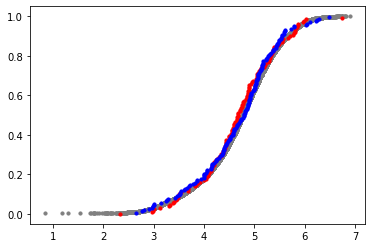

In [101]:
# generate y axis: cumulative proportion of genes
cum_all = np.arange(0, len(tss_deseq_res.iloc[nonsig_ix]), 1)
cum_all = cum_all/ len(tss_deseq_res.iloc[nonsig_ix])

plt.scatter(np.log10(tss_deseq_res.iloc[nonsig_ix]['distance_to_enhancer'].sort_values()), 
            cum_all, 
            color='grey',
            s=10,
            label='Non-regulated')


# generate y axis: cumulative proportion of genes
cum_up = np.arange(0, len(tss_deseq_res.iloc[up_ix]), 1)
cum_up = cum_up/ len(tss_deseq_res.iloc[up_ix])

plt.scatter(np.log10(tss_deseq_res.iloc[up_ix]['distance_to_enhancer'].sort_values()), 
            cum_up, 
            color='red', 
            s=10,
            label='Up-regulated')

# generate y axis: cumulative proportion of genes
cum_down = np.arange(0, len(tss_deseq_res.iloc[down_ix]), 1)
cum_down = cum_down/ len(tss_deseq_res.iloc[down_ix])

plt.scatter(np.log10(tss_deseq_res.iloc[down_ix]['distance_to_enhancer'].sort_values()),
            cum_down,
            color='blue',
            s=10,
            label='Down-regulated')
            